In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [11]:
# Load dataset
df = pd.read_csv('C:/Users/ACER/Downloads/water_potability.csv')

# Tampilkan beberapa baris pertama
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [12]:
# Cek missing values
print(df.isnull().sum())

# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [13]:
# Definisikan fitur dan target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6277915632754343
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       231
           1       0.57      0.52      0.54       172

    accuracy                           0.63       403
   macro avg       0.62      0.61      0.61       403
weighted avg       0.62      0.63      0.62       403

Confusion Matrix:
[[164  67]
 [ 83  89]]


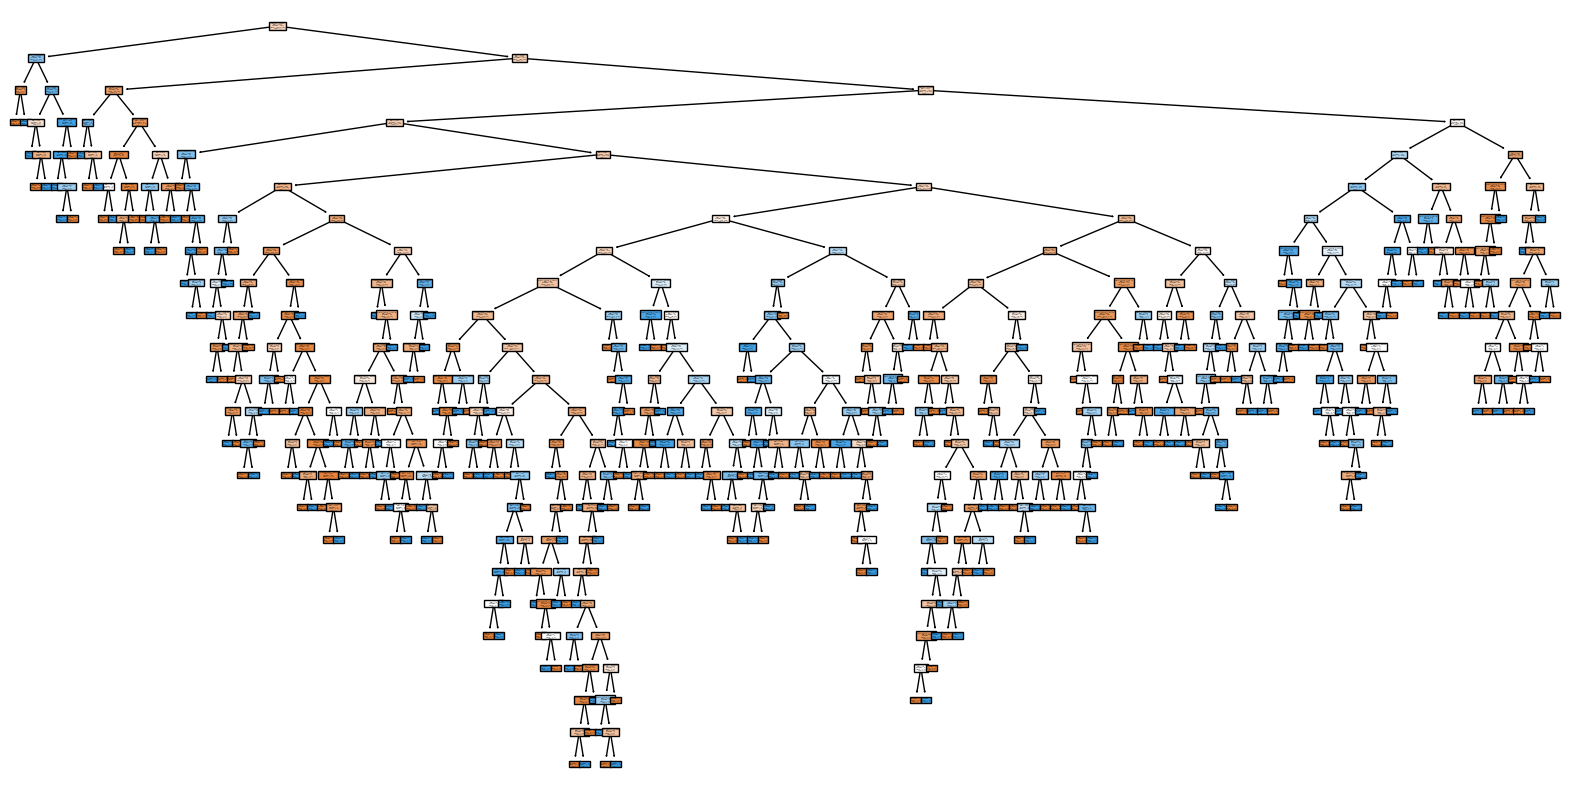

In [16]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()